# Lab 3: Clustering and Manifold Learning

This notebook demonstrates:
- the k-Means clustering algorithm
- the use of manifold-learning techniques to project a clustered dataset into a 2D space and visualise it as a scatterplot

It is assumed that the input dataset contains ___only numerical___ attributes. To use this code with a dataset that contains categorical attributes, they first need to be _somehow_ transformed to numerical. How categorical attributes can be represented as numerical may depend on the nature of the dataset.

When you go through this notebook for the first time you may __skip section C__ and go back to it at the end.

### A. Import Python Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed


from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

#### Load the dataset

In [2]:
lab3_df = pd.read_csv("./loans_dataset_et3.csv")
lab3_data = np.array(lab3_df.values, dtype=float)
print('(number of examples, number of attributes): ', lab3_data.shape)

(number of examples, number of attributes):  (332, 5)


In [3]:
lab3_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,2483,2466.0,90,180,0
1,4917,0.0,130,360,0
2,4106,0.0,40,180,1
3,3859,3300.0,142,180,1
4,6417,0.0,157,180,1


In [4]:
lab3_df.mean()

ApplicantIncome      5201.093373
CoapplicantIncome    1495.508795
LoanAmount            140.882530
Loan_Amount_Term      341.710843
Credit_History          0.978916
dtype: float64

In [5]:
seed(1)

### B. Scale the Data
Here we scale the values in each column to the interval [0,1]. See https://scikit-learn.org/stable/modules/preprocessing.html for alternative scaling methods. In yout work on this excersise experiment with other scaling techniques to see if they lead to a more insightful clustering.

In [6]:
min_max_scaler = preprocessing.MinMaxScaler()
lab3_data = min_max_scaler.fit_transform(lab3_data)

#Scaled data has zero mean and unit variance
#lab3_data = preprocessing.scale(lab3_data)

#MaxAbsScaler will not be used because this method is meant for data that is already centered at zero or sparse data, which is not our case here
#max_abs_scaler = preprocessing.MaxAbsScaler()
#lab3_data = max_abs_scaler.fit_transform(lab3_data)


In [7]:
print(pd.DataFrame(lab3_data).min())
print(pd.DataFrame(lab3_data).max())
print(pd.DataFrame(lab3_data).mean())
print(pd.DataFrame(lab3_data).std())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64
0    0.115772
1    0.074775
2    0.212491
3    0.670740
4    0.978916
dtype: float64
0    0.116502
1    0.099137
2    0.129578
3    0.146789
4    0.143882
dtype: float64


### C. Scatterplot Function (to be used below for visualising a clustering)

Skip this section when you read the notebook for the first time.

In [8]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### D. K-Means Clustering

Number of clusters $k$.

In [9]:
k = 2

#### Run k-Means

See https://scikit-learn.org/stable/modules/clustering.html for alternative clustering methods.

In [10]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(lab3_data)

### E. Apply a manifold-learning technique to project the data set to a 2D space

https://scikit-learn.org/stable/modules/manifold.html

In [11]:
# append the cluster centers to the dataset
lab3_data_and_centers = np.r_[lab3_data,clustered_data_sklearn.cluster_centers_]

#### E1. Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

In [12]:
# project both th data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.MDS(n_components=2).fit_transform(lab3_data_and_centers)
print("transformation complete")

transformation complete


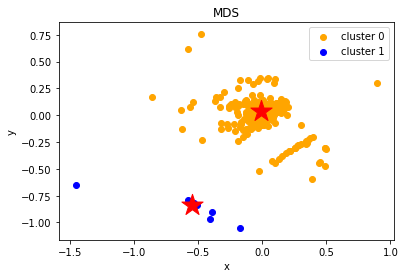

In [13]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

#### E2. Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [14]:
# project both th data and the k-Means cluster centers to a 2D space
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(lab3_data_and_centers)
print("transformation complete")

transformation complete


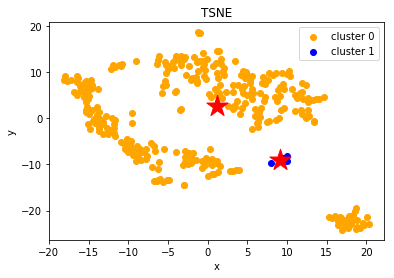

In [15]:
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
# plot the transformed examples and the centers
# use the cluster assignment to colour the examples
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

### F. Cluster Analysis

#### Add the cluster labels as an extra column in the original dataframe

In [16]:
lab3_df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=lab3_df.index)

In [17]:
lab3_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,cluster
0,2483,2466.0,90,180,0,1
1,4917,0.0,130,360,0,1
2,4106,0.0,40,180,1,0
3,3859,3300.0,142,180,1,0
4,6417,0.0,157,180,1,0


In [18]:
lab3_df.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,cluster
327,5417,4196.0,267,360,1,0
328,16666,0.0,275,360,1,0
329,10750,0.0,312,360,1,0
330,5955,5625.0,315,360,1,0
331,6133,3906.0,324,360,1,0


#### Compute the mean value of each attribute for each cluster

In [19]:
lab3_df.groupby('cluster').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
cluster,,,,,
0,5115.956923,1482.528985,139.473846,342.424615,1.0
1,9153.857143,2098.142857,206.285714,308.571429,0.0


#### Conclusion

By looking at the table above we can argue that:
* Credit history splits perfectly data, cluster 0 is mapped with credit_history=1 and cluster 1 is for credit_history=0
* Cluster 1 contains people with higher income for themselves and for Coapplicants, and also with higher LoanAmount
* Cluster 0 is having greater Loan_Amount_Term

